In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.rcParams.update({'font.size': 16})


In [70]:
nsize=60; 
Npreds=10;

labels=['Temperature','Inversion Strength','Surface Relative Humidity','Omega 500','Dew Point','CCNs','Wind Speed','Lapse Rate','Static Stability','Helicity']
betas=np.asarray([1.6, 1.2, 1.1, 0.8, 0,
       0.0, 0.0,0.0,0.0,0.00])
Z=np.ones([nsize,Npreds])
for j in np.arange(0,Npreds):
    Z[:,j]=stats.norm.rvs(loc=0,scale=1,size=nsize)

sigma_e=1.5
e=stats.norm.rvs(0,sigma_e,nsize)

y=np.matmul(Z,betas)+e

df =pd.concat([pd.DataFrame(data=Z,index=None,columns=labels),pd.DataFrame(data=y,index=None,columns=['cld'])],axis=1)
df.to_csv('CCFs.csv')

In [56]:
df=pd.read_csv('CCFs.csv')
y=df['cld'].values
Z=df[labels].values

In [66]:
train_set=np.arange(0,20)
valid_set=np.arange(20,40)
test_set =np.arange(40,60)


X=Z[:,0:5]
X_train=X[train_set,:]
y_train=y[train_set]

X_test=X[test_set,:]
y_test=y[test_set]

X_valid=X[valid_set,:]
y_valid=y[valid_set]


model=LinearRegression().fit(X_train,y_train)
yhat_train=model.predict(X_train)
yhat_test =model.predict(X_test)
yhat_valid=model.predict(X_valid)

mse_train=np.sum((yhat_train-y_train)**2)/len(y_train)

mse_test =np.sum((yhat_test -y_test )**2)/len(y_test)
mse_valid=np.sum((yhat_valid-y_valid)**2)/len(y_valid)



0.4318062984206065


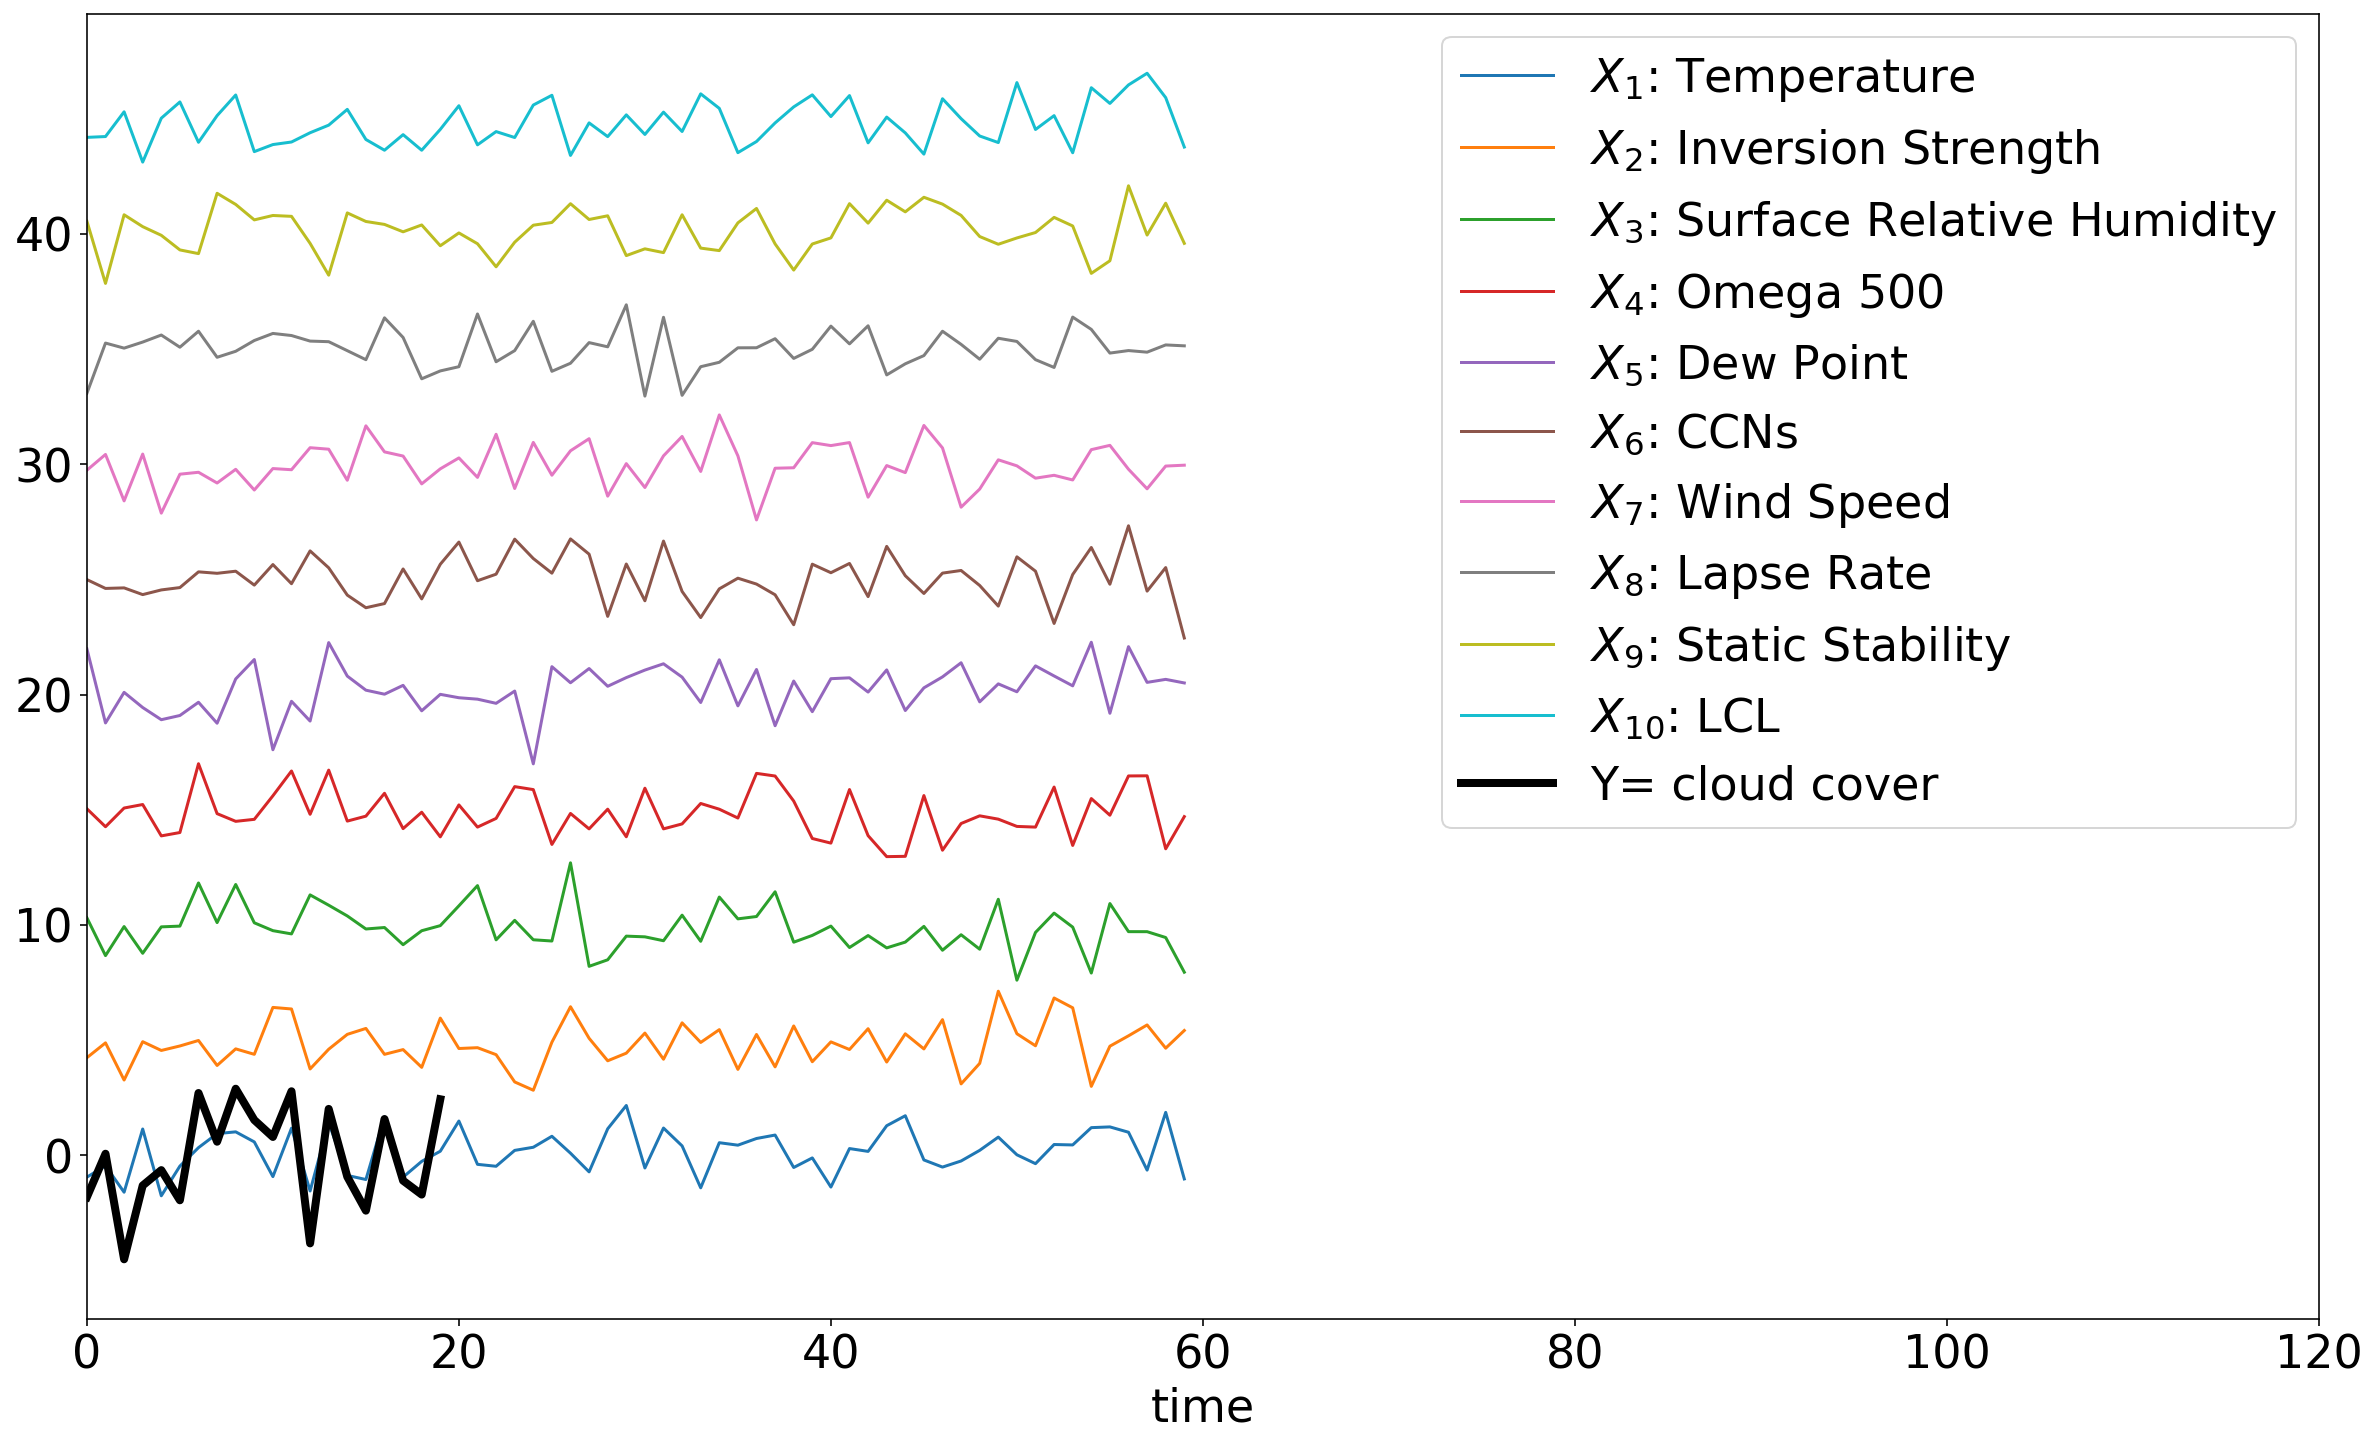

In [69]:
fig,ax=plt.subplots(1,figsize=[20,12])
for j in range(Npreds):
    plt.plot(Z[0:100,j]+5*j,label='$X_{'+str(j+1)+'}$: '+labels[j]);
    plt.xlabel('time')
plt.plot(y_train,'k',linewidth=4,label='Y= cloud cover')
#plt.plot(y[0:60]-e[0:60],'r',linewidth=4,label='Y= observed cloud cover')
plt.legend()   
plt.xlim([0,120])


print(np.var(e)/np.var(y))

IndexError: invalid index to scalar variable.

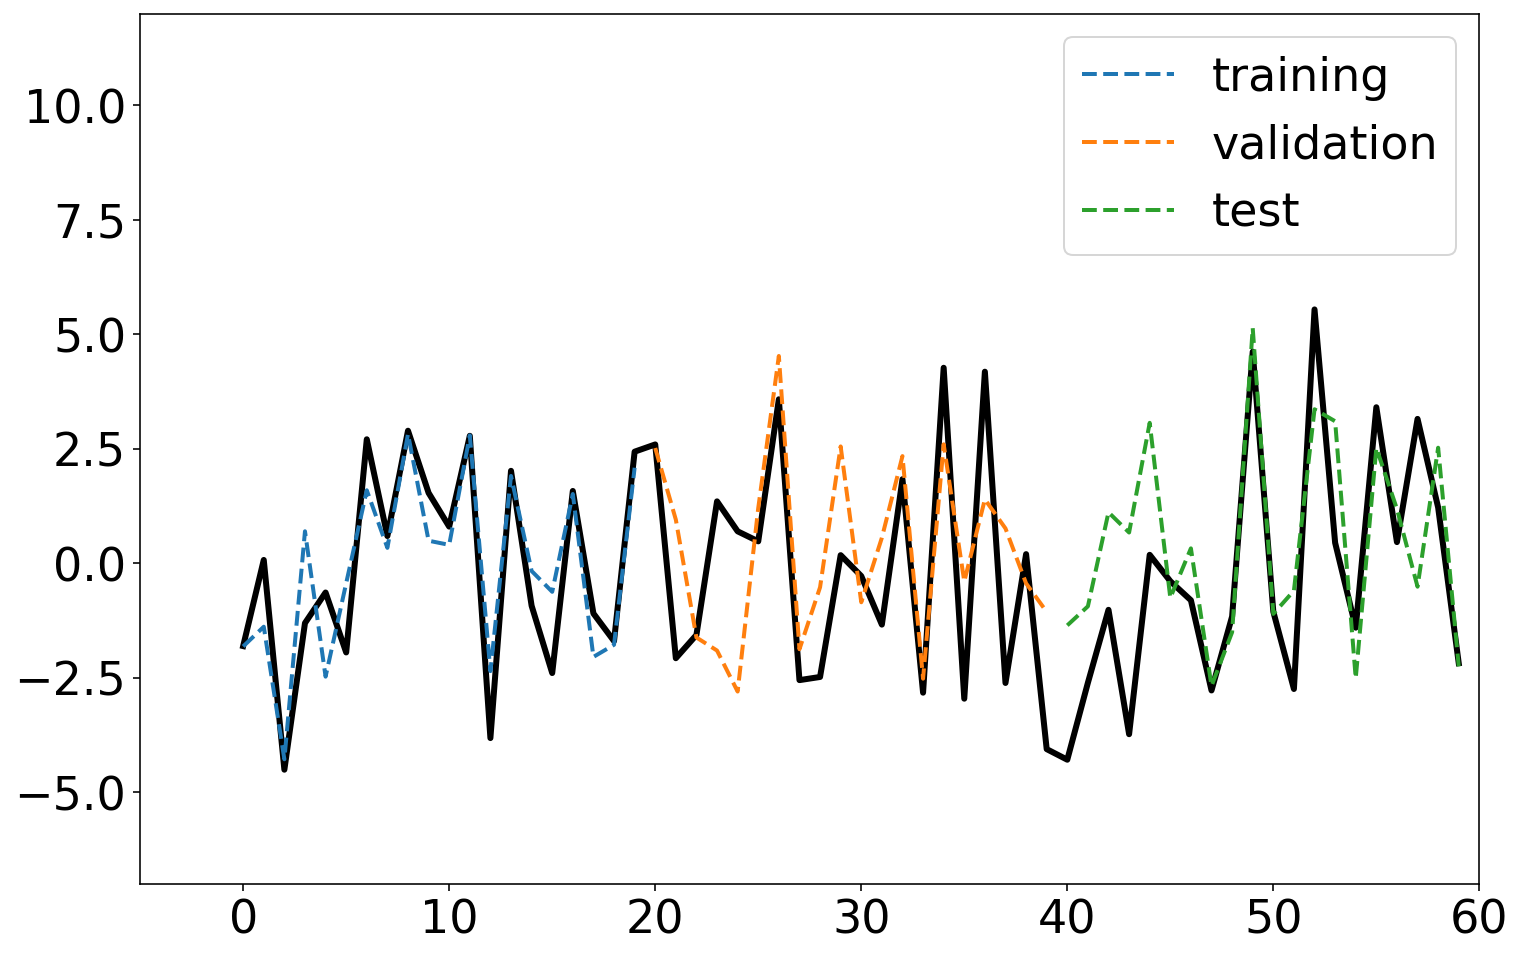

In [59]:
fig,ax=plt.subplots(1,figsize=[12,8])

plt.plot(y,'k',linewidth=3)
plt.plot(train_set,yhat_train,'--',linewidth=2,label='training')
plt.plot(valid_set,yhat_valid,'--',linewidth=2,label='validation')
plt.plot(test_set,yhat_test,'--',linewidth=2,label='test')

plt.legend()
plt.xlim(-5,60)
plt.ylim(-7,12)
plt.text(0,-6.5,'MSE train= '+np.array2string(mse_train[2],precision=2),fontsize=20)
plt.text(20,-6.5,'MSE test= '+np.array2string(mse_test[2],precision=2),fontsize=20)
plt.text(37,-6.5,'MSE validation= '+np.array2string(mse_valid[2],precision=2),fontsize=20)

In [60]:
mse_train=np.empty(Npreds)
mse_test =np.empty(Npreds)
mse_valid=np.empty(Npreds)

for m in np.arange(1,Npreds):
    #sigma_e=2
    #e=stats.norm.rvs(0,sigma_e,nsize)

    #y=np.dot(Z,betas)+e

    X=Z[:,0:m]
    X_train=X[train_set,:]
    y_train=y[train_set]

    X_test=X[test_set,:]
    y_test=y[test_set]

    X_valid=X[valid_set,:]
    y_valid=y[valid_set]


    model=LinearRegression().fit(X_train,y_train)
    yhat_train=model.predict(X_train)
    yhat_test =model.predict(X_test)
    yhat_valid=model.predict(X_valid)

    mse_train[m]=np.sum((yhat_train-y_train)**2)/len(y_train)
    mse_test [m]=np.sum((yhat_test -y_test )**2)/len(y_test)
    mse_valid[m]=np.sum((yhat_valid-y_valid)**2)/len(y_valid)

    print(np.shape(X_train))
    


(20, 1)
(20, 2)
(20, 3)
(20, 4)
(20, 5)
(20, 6)
(20, 7)
(20, 8)
(20, 9)


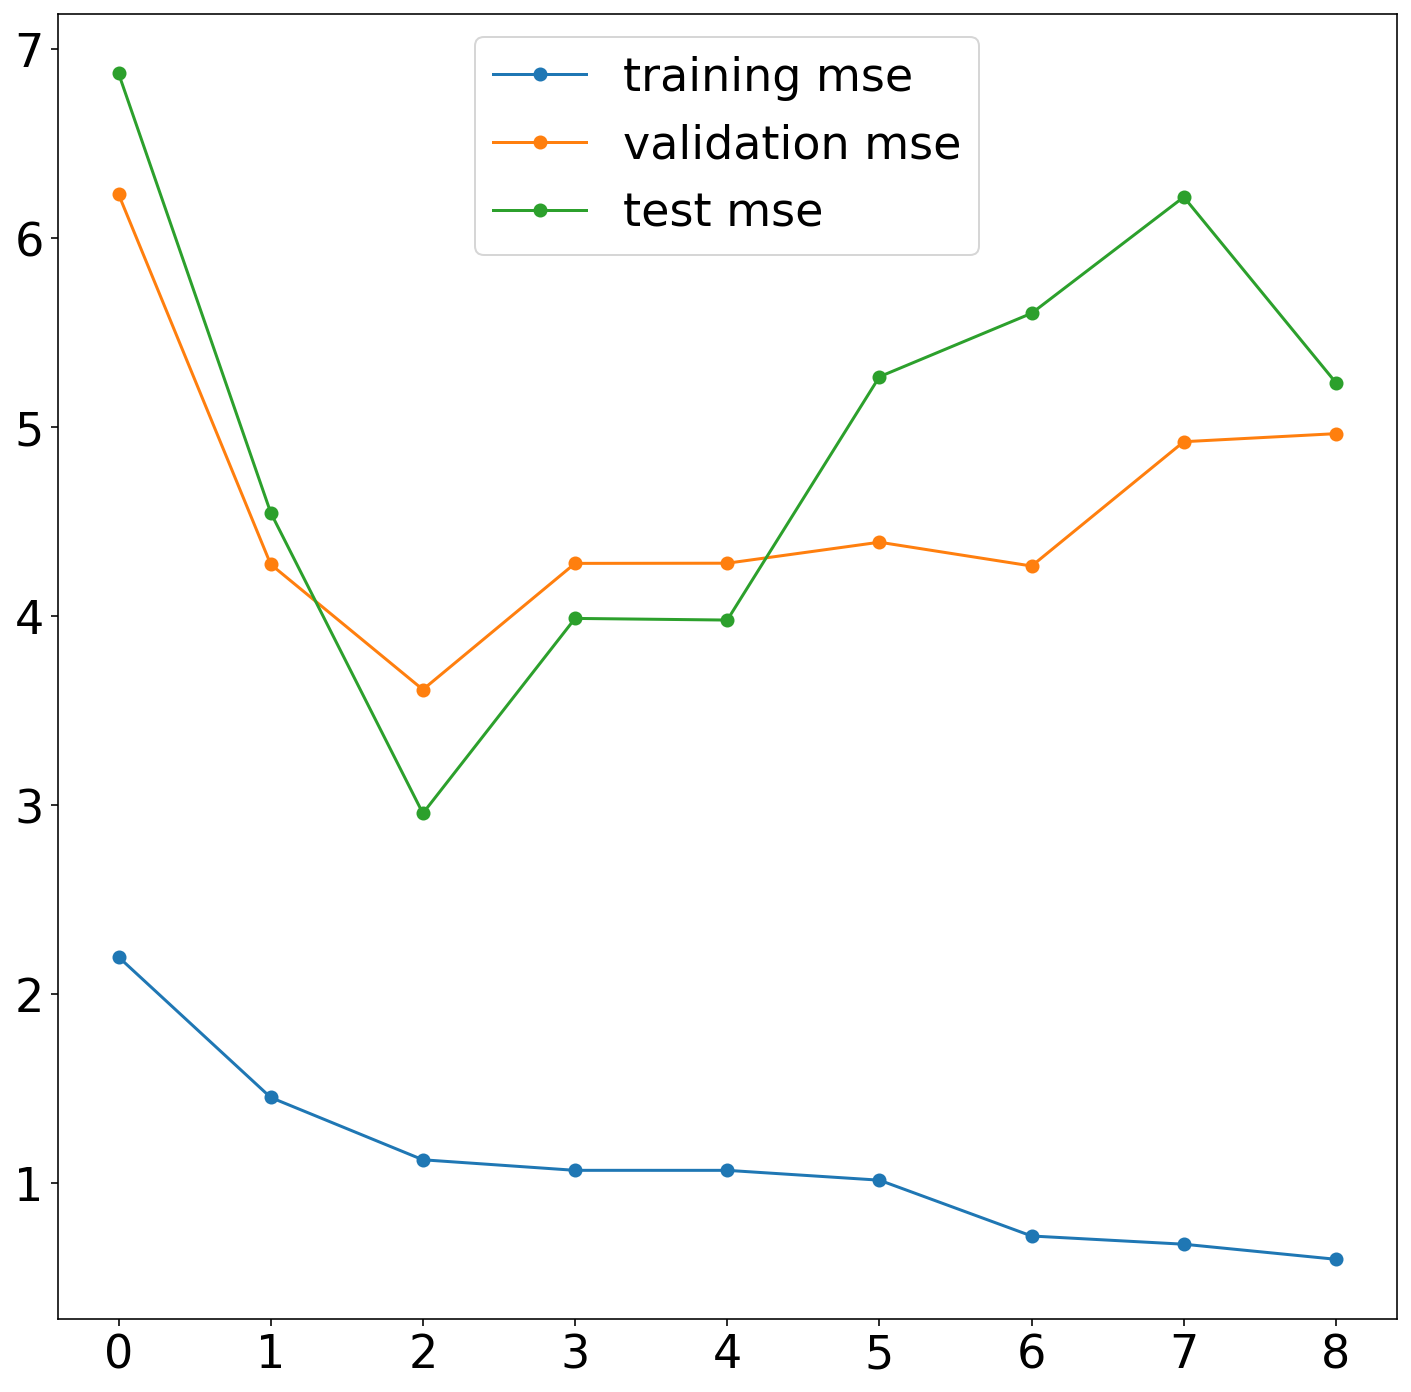

In [61]:
fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(mse_train[1:],'o-',label='training mse')
plt.plot(mse_valid[1:],'o-',label='validation mse')
plt.plot(mse_test[1:],'o-',label='test mse')

#plt.xlim(0,9)
plt.legend()
#plt.ylim(0,20)

(1.0, 6.0)

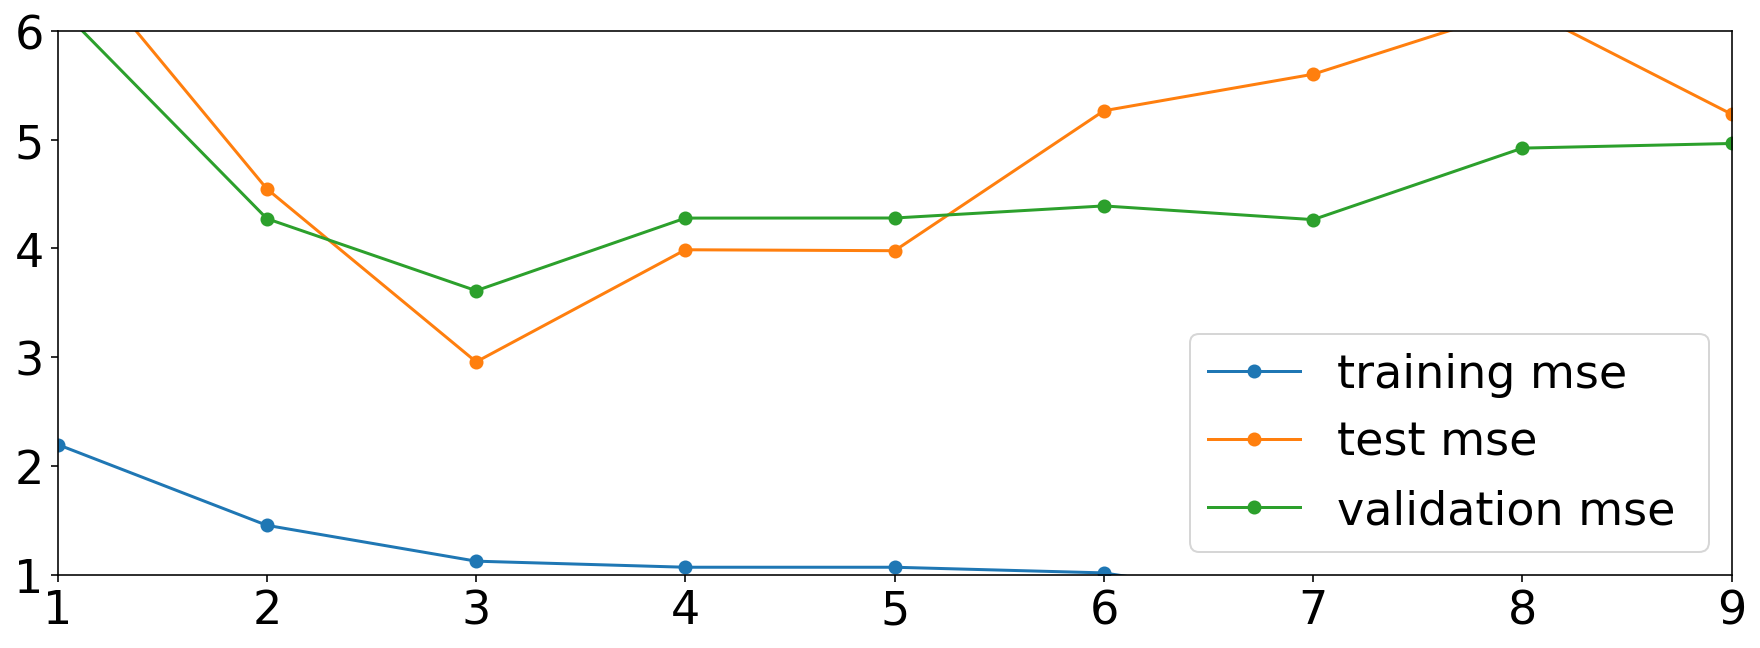

In [62]:
## fig,ax=plt.subplots(1,figsize=[12,12])
plt.plot(mse_train,'o-',label='training mse')
plt.plot(mse_test,'o-',label='test mse')
plt.plot(mse_valid,'o-',label='validation mse ')
plt.xlim(1,9)
plt.legend()
plt.ylim(1,6)

#### 

In [63]:
from sklearn.model_selection import KFold
n_splits=5

mse_train=np.zeros([Npreds,n_splits])
mse_test=np.zeros([Npreds,n_splits])
mse_valid=np.zeros([Npreds,n_splits])
for m in np.arange(1,Npreds):
    k=0
    X=Z[:,0:m]
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model=LinearRegression().fit(X_train,y_train)
        yhat_train=model.predict(X_train)
        yhat_test =model.predict(X_test)


        mse_train[m,k]=np.sum((yhat_train-y_train)**2)/len(y_train)
        mse_test [m,k]=np.sum((yhat_test -y_test )**2)/len(y_test)
        k=k+1
    
    

Text(0.5, 0, 'number of predictors')

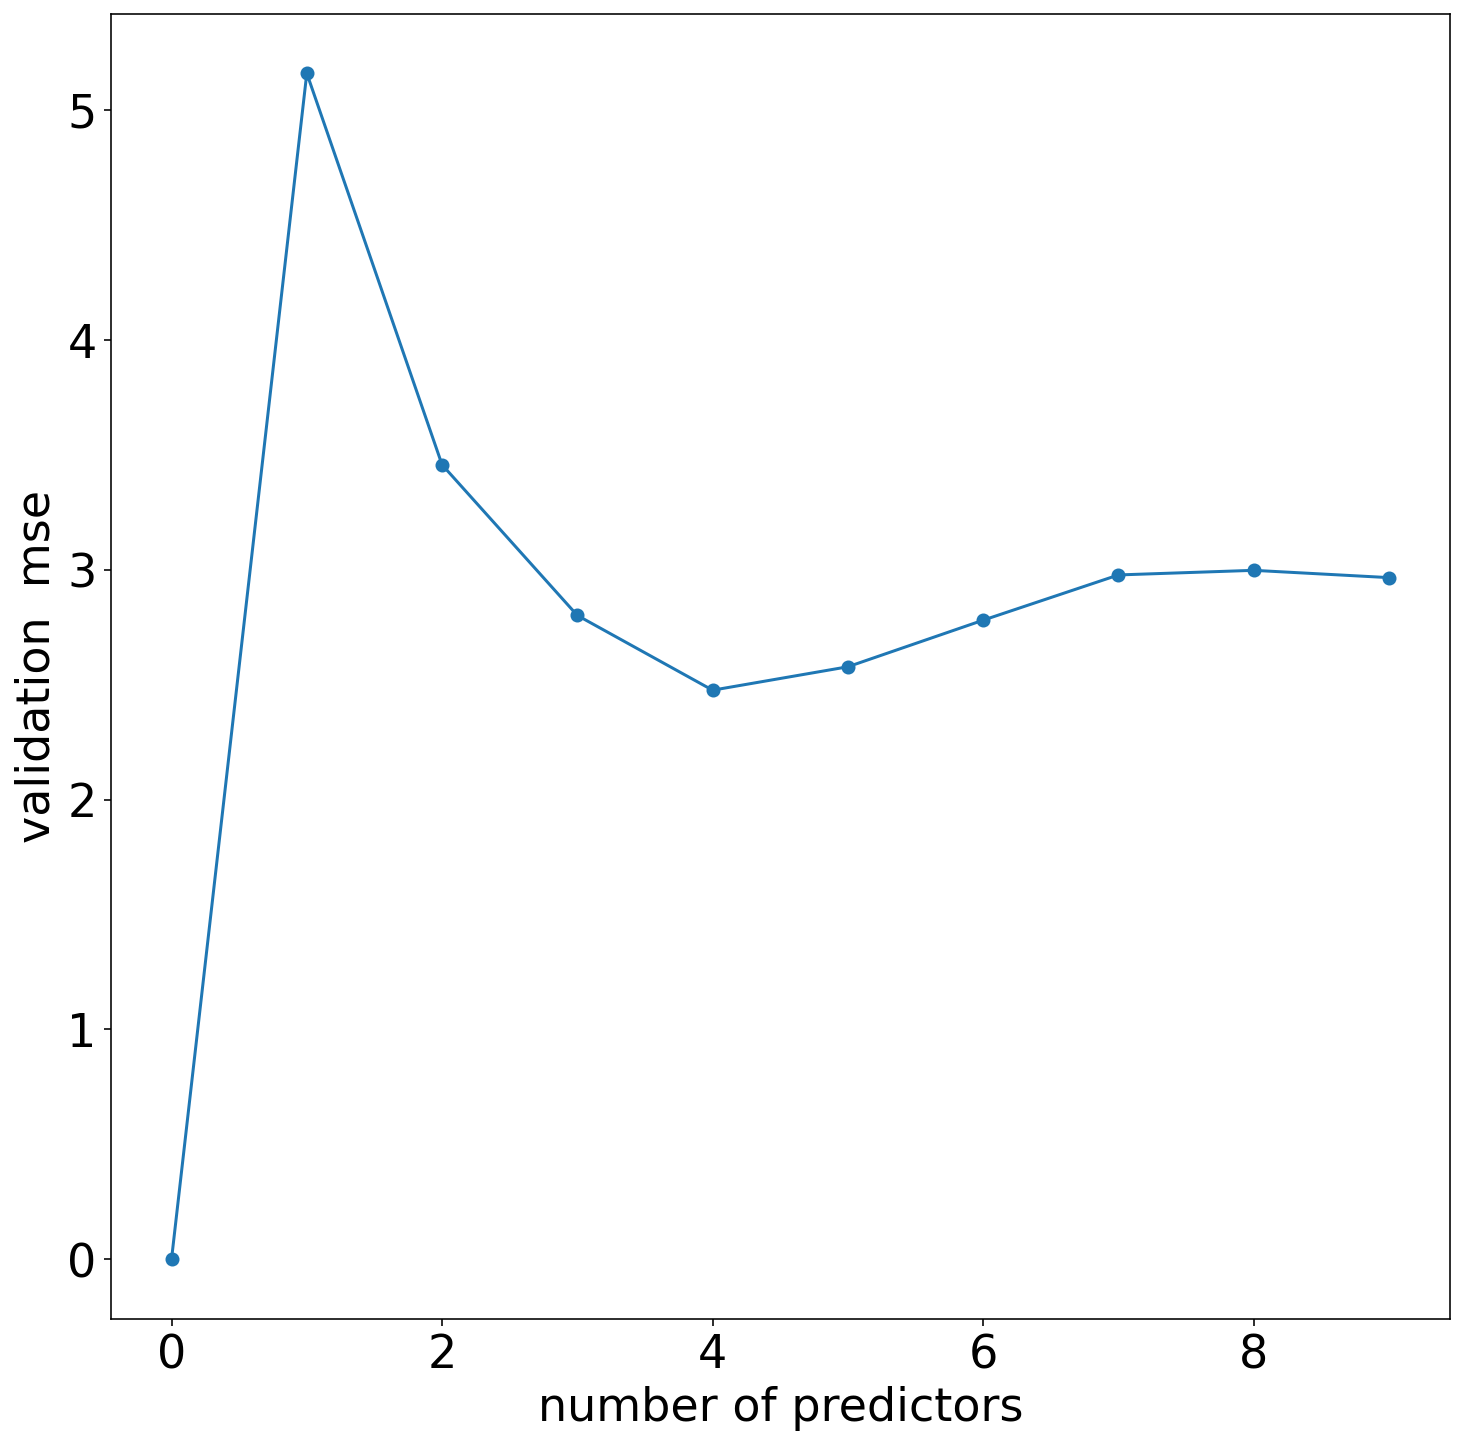

In [65]:
fig,ax=plt.subplots(1,figsize=[12,12])
#plt.plot(mse_train[1:],'o--',label='training mse')
plt.plot(np.mean(mse_test[:],1),'o-',label='validation mse')
#plt.plot(mse_test[1:],'o-',label='validation mse')
plt.ylabel('validation  mse')
plt.xlabel('number of predictors')
#plt.xlim(0,9)
#plt.legend()
#plt.ylim(0,20)

In [ ]:
    model=LinearRegression().fit(X_train,y_train)
    yhat_train=model.predict(X_train)
    yhat_test =model.predict(X_test)
    yhat_valid=model.predict(X_valid)

    mse_train[m]=np.sum((yhat_train-y_train)**2)/len(y_train)
    mse_test [m]=np.sum((yhat_test -y_test )**2)/len(y_test)
    mse_valid[m]=np.sum((yhat_valid-y_valid)**2)/len(y_valid)